<a href="https://colab.research.google.com/github/pullelamaheshbabu/700757323_Neural-Network/blob/main/Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100
92/92 - 4s - loss: 0.0562 - val_loss: 0.3187 - 4s/epoch - 39ms/step
Epoch 2/100
92/92 - 1s - loss: 0.0308 - val_loss: 0.2338 - 503ms/epoch - 5ms/step
Epoch 3/100
92/92 - 0s - loss: 0.0219 - val_loss: 0.1931 - 431ms/epoch - 5ms/step
Epoch 4/100
92/92 - 0s - loss: 0.0194 - val_loss: 0.1709 - 307ms/epoch - 3ms/step
Epoch 5/100
92/92 - 0s - loss: 0.0202 - val_loss: 0.1574 - 309ms/epoch - 3ms/step
Epoch 6/100
92/92 - 0s - loss: 0.0172 - val_loss: 0.1449 - 407ms/epoch - 4ms/step
Epoch 7/100
92/92 - 0s - loss: 0.0185 - val_loss: 0.1443 - 298ms/epoch - 3ms/step
Epoch 8/100
92/92 - 0s - loss: 0.0153 - val_loss: 0.1357 - 371ms/epoch - 4ms/step
Epoch 9/100
92/92 - 0s - loss: 0.0176 - val_loss: 0.1338 - 290ms/epoch - 3ms/step
Epoch 10/100
92/92 - 0s - loss: 0.0143 - val_loss: 0.1207 - 277ms/epoch - 3ms/step
Epoch 11/100
92/92 - 0s - loss: 0.0153 - val_loss: 0.1221 - 277ms/epoch - 3ms/step
Epoch 12/100
92/92 - 0s - loss: 0.0142 - val_loss: 0.1080 - 291ms/epoch - 3ms/step
Epoch 13/100
92

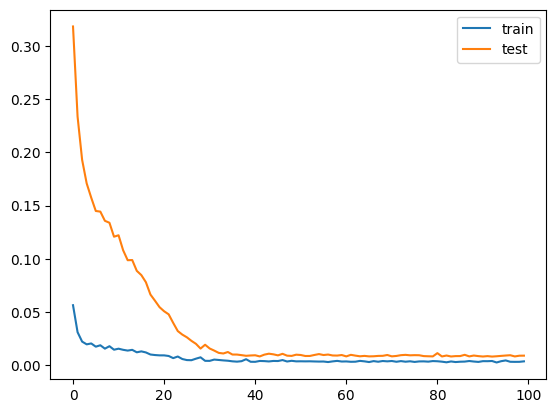

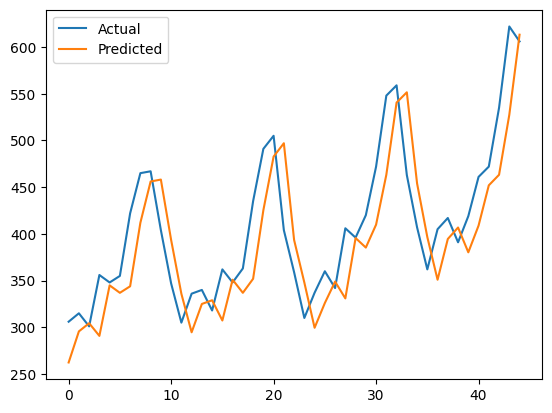

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Step 1: Dataset Preparation
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
dataset = pd.read_csv(url, usecols=[1], engine='python', skipfooter=3)
data = dataset.values.astype('float32')

# Normalize dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data)

# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Step 2: Model Architecture
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dropout(0.2)) # Adding dropout to prevent overfitting
model.add(Dense(1))

# Step 3: Model Training
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs=100, batch_size=1, validation_data=(testX, testY), verbose=2)

# Step 4: Model Evaluation
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])

# Step 5: Visualization
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

plt.plot(testY_inverse.flatten(), label='Actual')
plt.plot(testPredict.flatten(), label='Predicted')
plt.legend()
plt.show()

# Challenges Encountered during Model Training and Optimization:
# One challenge is overfitting, which can be mitigated using dropout layers.
# Convergence issues can be addressed by monitoring training and validation loss.
# Hyperparameter tuning is time-consuming but necessary for optimizing model performance.

# Decision on the Number of LSTM Layers and Units:
# Start with a simple architecture and increase complexity gradually.
# Experiment with different configurations and choose based on validation performance.

# Preprocessing Steps on the Time Series Data:
# Normalize data to a uniform range using Min-Max scaling.
# Reshape data to fit the input requirements of the LSTM model.

# Purpose of Dropout Layers in LSTM Networks:
# Dropout layers prevent overfitting by randomly dropping connections during training.
# They encourage the model to learn more robust representations.

# Analysis of the Model's Ability to Capture Long-Term Dependencies:
# LSTM networks are effective at capturing long-term dependencies due to their memory cell structure.
# The model's performance can be assessed by comparing actual vs. predicted values.

# Potential Improvements or Alternative Approaches:
# Experiment with more complex architectures, feature engineering, and ensemble methods.
# Advanced techniques like Bayesian optimization and transfer learning can also be explored.

